# Perfect Plots: Combiplot


## Global market sales

Source of data: https://github.com/vkrit/data-science-class/blob/master/WA_Fn-UseC_-Sales-Win-Loss.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('c:/1/WA_Fn-UseC_-Sales-Win-Loss.csv')
df.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


In [2]:
SKS = df.pivot_table(index='Region',values='Sales Stage Change Count', aggfunc=['sum','mean']).reset_index()
SKS

,Region,sum,mean
,,Sales Stage Change Count,Sales Stage Change Count
0,Mid-Atlantic,23050,3.045719
1,Midwest,61569,2.929068
2,Northeast,22247,3.023512
3,Northwest,27939,2.924937
4,Pacific,42636,2.815744
5,Southeast,28278,3.063042
6,Southwest,24902,3.054336


In [3]:
SKS.columns

MultiIndex(levels=[['sum', 'mean', 'Region'], ['Sales Stage Change Count', '']],
           codes=[[2, 0, 1], [1, 0, 0]])

#### <span style="color:blue">Merge column names</span>

In [4]:
SKS.columns = ['_'.join(col) for col in SKS.columns.values]
SKS

,Region_,sum_Sales Stage Change Count,mean_Sales Stage Change Count
0,Mid-Atlantic,23050,3.045719
1,Midwest,61569,2.929068
2,Northeast,22247,3.023512
3,Northwest,27939,2.924937
4,Pacific,42636,2.815744
5,Southeast,28278,3.063042
6,Southwest,24902,3.054336


#### <span style="color:blue">Combiplot</span>

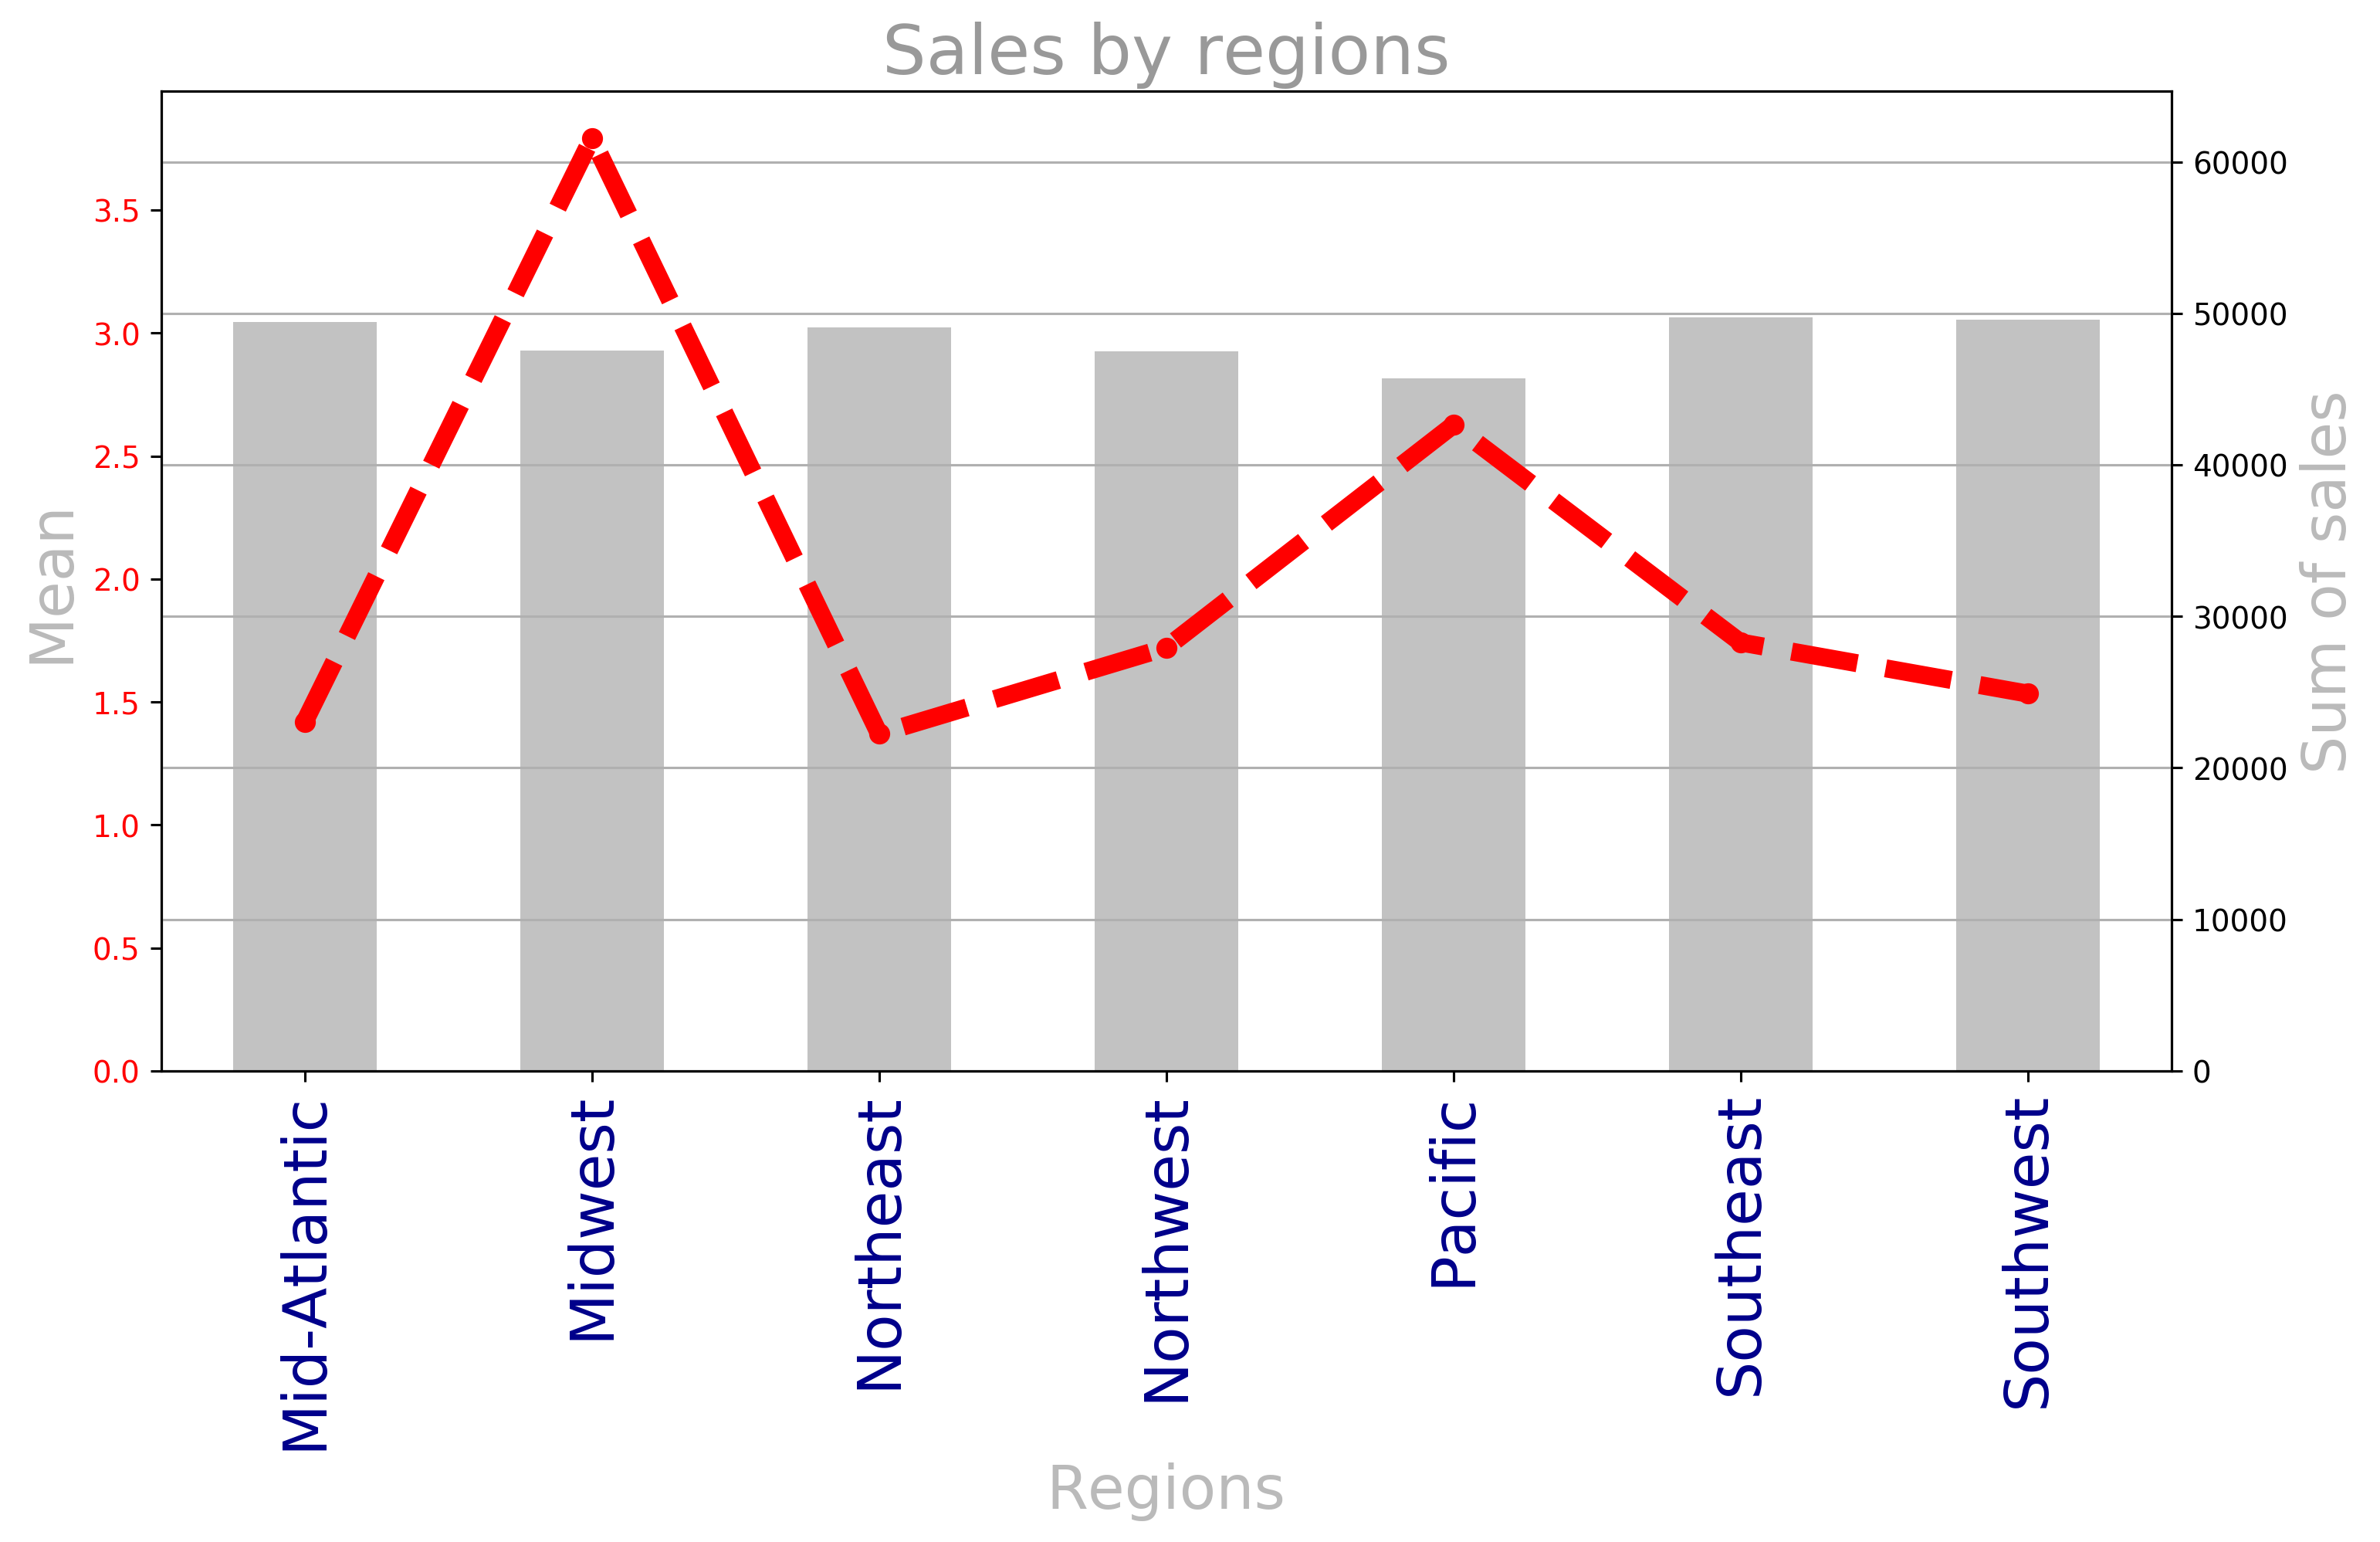

In [10]:
fig = plt.figure(figsize=(12,6), dpi= 280)

ax = SKS['mean_Sales Stage Change Count'].plot(kind="bar", color='darkgrey',alpha=0.7)
ax.set_ylim(0,1.3*SKS["mean_Sales Stage Change Count"].max())
ax.set_xlabel("Regions", color='darkgrey',alpha=0.8, fontsize=20)
ax.set_ylabel(r"Mean", color='darkgrey',alpha=0.8, fontsize=20)
ax.grid(False)
ax.tick_params(axis='y', rotation=0, labelcolor='red')
ax.tick_params(axis='x', rotation=90, labelcolor='darkblue')
ax.set_xticklabels(SKS['Region_'], rotation=90, fontdict={'fontsize':20})


ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),SKS['sum_Sales Stage Change Count'],'--', marker='o', c='red', linewidth=6)
ax2.set_ylim(0,1.05*SKS["sum_Sales Stage Change Count"].max())
ax2.grid(True)
ax2.set_ylabel(r"Sum of sales", color='darkgrey',alpha=0.8, fontsize=20)
ax2.set_title("Sales by regions", fontsize=23, alpha=0.4)

plt.show()